# Document Loader

In [21]:
from langchain_community.document_loaders import PyPDFLoader, TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from typing import List, Optional
from langchain.schema import Document
from pathlib import Path

In [16]:
file_path= r"D:\GENAIProjects\calling-repasentive-ai\calling-agent\data"

In [22]:
text_splitter = RecursiveCharacterTextSplitter(
            chunk_size = 1024,
            chunk_overlap = 100,
            length_function=len
        )

In [29]:
dir_path = Path(file_path)
all_documents = []

for file in dir_path.iterdir():
    if file.suffix == '.pdf':
        loader = PyPDFLoader(str(file))
  
    else:
        print(f"Skipping unsupported file type: {file.name}")
        continue

Skipping unsupported file type: multimodal.txt


In [31]:
docs = loader.load()

In [35]:
docs[1]

Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2021-04-13T00:48:38+00:00', 'author': '', 'keywords': '', 'moddate': '2021-04-13T00:48:38+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'subject': '', 'title': '', 'trapped': '/False', 'source': 'D:\\GENAIProjects\\calling-repasentive-ai\\calling-agent\\data\\RAG_arxiv.pdf', 'total_pages': 19, 'page': 1, 'page_label': '2'}, page_content='The\tDivine\nComedy\t(x) q \nQuery \nEncoder \nq(x) \nMIPS p θ \nGenerator\xa0pθ\n(Parametric) \nMargin- \nalize \nThis\t14th\tcentury\twork\nis\tdivided\tinto\t3\nsections:\t"Inferno",\n"Purgatorio"\t&\n"Paradiso"\t\t\t\t\t\t\t\t\t(y)\nEnd-to-End Backprop through q  and\xa0p θ \nBarack\tObama\twas\nborn\tin\tHawaii.(x)\nFact Veriﬁcation: Fact Query\nsupports\t(y)\nQuestion Generation\nFact Veriﬁcation:\nLabel Generation\nDocument \nIndex \nDefine\t"middle\tear"(x)\nQuestion Answering:

In [33]:
all_documents = []
for doc in docs:
    src = doc.metadata.get("source", str(file.name))
    all_documents.append(
        Document(
            page_content=doc.page_content,
            metadata={'source': src}
        )
    )

In [34]:
all_documents[1]

Document(metadata={'source': 'D:\\GENAIProjects\\calling-repasentive-ai\\calling-agent\\data\\RAG_arxiv.pdf'}, page_content='The\tDivine\nComedy\t(x) q \nQuery \nEncoder \nq(x) \nMIPS p θ \nGenerator\xa0pθ\n(Parametric) \nMargin- \nalize \nThis\t14th\tcentury\twork\nis\tdivided\tinto\t3\nsections:\t"Inferno",\n"Purgatorio"\t&\n"Paradiso"\t\t\t\t\t\t\t\t\t(y)\nEnd-to-End Backprop through q  and\xa0p θ \nBarack\tObama\twas\nborn\tin\tHawaii.(x)\nFact Veriﬁcation: Fact Query\nsupports\t(y)\nQuestion Generation\nFact Veriﬁcation:\nLabel Generation\nDocument \nIndex \nDefine\t"middle\tear"(x)\nQuestion Answering:\nQuestion Query\nThe\tmiddle\tear\tincludes\nthe\ttympanic\tcavity\tand\nthe\tthree\tossicles.\t\t(y)\nQuestion Answering:\nAnswer GenerationRetriever pη \n(Non-Parametric) \nz 4 \nz 3 \nz 2 \nz 1 \nd(z) \nJeopardy Question\nGeneration:\nAnswer Query\nFigure 1: Overview of our approach. We combine a pre-trained retriever (Query Encoder + Document\nIndex) with a pre-trained seq2seq 

In [27]:
def load_document(file_path: str) -> Optional[List[Document]]:
    """
    Loads documents from a directory and splits them into chunks.

    Args:
        file_path: Path to a directory containing document files

    Returns:
        List of document chunks or None if loading fails
    """
    try:
        dir_path = Path(file_path)
        all_documents = []

        for file in dir_path.iterdir():
            if file.suffix == '.pdf':
                loader = PyPDFLoader(str(file))
          
            else:
                print(f"Skipping unsupported file type: {file.name}")
                continue

            # Load the document
            docs = loader.load()

            # Add metadata and wrap in Document schema
            for doc in docs:
                src = doc.metadata.get("source", str(file.name))
                all_documents.append(
                    Document(
                        page_content=doc.page_content,
                        metadata={'source': src}
                    )
                )

        if not all_documents:
            print(f"No valid documents found in '{file_path}'")
            return None

        # Split into chunks
        doc_chunks = text_splitter.split_documents(all_documents)

        if not doc_chunks:
            print(f"No chunks generated from '{file_path}'.")
            return None

        print(f"Loaded documents from '{file_path}': {len(doc_chunks)} chunks.")
        return doc_chunks

    except Exception as e:
        print(f"Failed to load documents from '{file_path}': {e}")
        return None


In [42]:
doc_chunks= load_document(file_path=file_path)

Skipping unsupported file type: multimodal.txt
Loaded documents from 'D:\GENAIProjects\calling-repasentive-ai\calling-agent\data': 101 chunks.


# Embedding Load

In [38]:
from langchain_huggingface import HuggingFaceEmbeddings

def load_embedings():
        """
        Download and return the HuggingFace embeddings model.
        """
        model_kwargs = {'device': 'cpu'}
        encode_kwargs = {'normalize_embeddings': False}
        embeddings = HuggingFaceEmbeddings(
            model_name='sentence-transformers/all-MiniLM-L6-v2',
            model_kwargs=model_kwargs,
            encode_kwargs=encode_kwargs
        )
        # Embedding dimension
        dim = len(embeddings.embed_query("hello"))
        return embeddings, dim

In [39]:
embedings,dim=load_embedings()

d:\GENAIProjects\calling-repasentive-ai\calling-agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
dim

384

# Vectore Store

In [63]:
import os
import getpass
if not os.getenv("PINECONE_API_KEY"):
    os.environ["PINECONE_API_KEY"] = getpass.getpass("Enter your Pinecone API key: ")

In [64]:
from pinecone import Pinecone
pinecone_api_key = os.environ.get("PINECONE_API_KEY")

pc = Pinecone(api_key=pinecone_api_key)

In [65]:
from pinecone import ServerlessSpec

index_name = "langchain-test-index"  # change if desired

if not pc.has_index(index_name):
    pc.create_index(
        name=index_name,
        dimension=dim,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )

index = pc.Index(index_name)

In [66]:
from langchain_pinecone import PineconeVectorStore

vector_store = PineconeVectorStore(index=index, embedding=embedings)

In [69]:
vector_store.from_documents(
    documents=doc_chunks,
    index_name= index_name,
    embedding=embedings
)

## Dense Vector Store

In [ ]:
import getpass
if not os.getenv("PINECONE_API_KEY"):
    os.environ["PINECONE_API_KEY"] = getpass.getpass("Enter your Pinecone API key: ")
    
pinecone_api_key = os.environ.get("PINECONE_API_KEY")

In [86]:
from langchain_pinecone import PineconeSparseVectorStore
from pinecone import Pinecone, ServerlessSpec

def vectore_store_dense(embeddings, embeddings_dim, doc_chunks):
	try:
		index_name = "agentic-rag"
		pc = Pinecone(api_key=pinecone_api_key)

		if not pc.has_index(index_name):
			pc.create_index(
				name=index_name,
				dimension=embeddings_dim,
				metric="cosine",
				spec=ServerlessSpec(cloud="aws", region="us-east-1"),
			)

		index = pc.Index(index_name)

		vector_store = PineconeVectorStore(index=index, embedding=embeddings)
		vector_store.from_documents(
			documents=doc_chunks,
			index_name=index_name,
			embedding=embeddings
		)

		print("PinecodeDB vector store setup Completed.")
		return vector_store

	except Exception as e:
		print(f"Error in vector DB: {e}")
		raise e
    

In [87]:
dense_vector_store=vectore_store_dense(
    embeddings=embedings,
    embeddings_dim=dim,
    doc_chunks=doc_chunks
)

PinecodeDB vector store setup Completed.


## Sparse Vector Store

In [78]:
from langchain_pinecone import PineconeSparseVectorStore
from pinecone import Pinecone, ServerlessSpec
from typing import Any
import os

def vectore_store_sparse(embeddings: Any, embeddings_dim: int, doc_chunks: list):
    try:
        index_name = "agentic-rag"
        pc = Pinecone(api_key=pinecone_api_key)

        # Create index if it doesn't exist
        if not pc.list_indexes() or index_name not in pc.list_indexes().names():
            pc.create_index(
                name=index_name,
                dimension=embeddings_dim,
                metric="cosine",
                spec=ServerlessSpec(cloud="aws", region="us-east-1"),
            )

        index = pc.Index(index_name)

        # ❗Correct usage of `from_documents` (classmethod)
        vector_store = PineconeSparseVectorStore.from_documents(
            documents=doc_chunks,
            embedding=embeddings,
            index_name=index_name
        )

        print("✅ Pinecone sparse vector store setup completed.")

        return vector_store

    except Exception as e:
        print(f"❌ Error in vector DB setup: {e}")
        raise


In [75]:
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embeddings_sparse = HuggingFaceEmbeddings(
            model_name="naver/splade-cocondenser-ensembledistil",
            model_kwargs=model_kwargs,
            encode_kwargs=encode_kwargs
        )

No sentence-transformers model found with name naver/splade-cocondenser-ensembledistil. Creating a new one with mean pooling.
Some weights of BertModel were not initialized from the model checkpoint at naver/splade-cocondenser-ensembledistil and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
splade_model_dim =len(embeddings_sparse.embed_query("hello"))

In [81]:
vectore_store_sparse(
    embeddings=embedings,
    embeddings_dim=splade_model_dim,
    doc_chunks=doc_chunks
)

❌ Error in vector DB setup: PineconeSparseVectorStore can only be used with Sparse Indexes


ValueError: PineconeSparseVectorStore can only be used with Sparse Indexes

# Retriever

In [85]:
dense_vector_store.similarity_search(
	"Type Switchgear Transformer",
    k =2
)

AttributeError: 'NoneType' object has no attribute 'similarity_search'

In [92]:
results=dense_vector_store.similarity_search("Type Switchgear Transformer")

In [93]:
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")

* 35
nkt cables SWITCHGEAR & TRANSFORMER TERMINATION Underground Transmission Solutions 
Cable Accessories
Type Switchgear Transformer KSEV 72  
KTEV 72
KSEV 145  
KTEV 145
KSEV 245  
KTEV 245
Operation Voltage Um (kV) 72 145 245
Conductor Cu/Al  Max. (kcmil) 2000 2500 5000
Diameter Over Dielectric Min.-Max. (inches) 1.5-2.9 1.5-2.9 1.8-3.9
Diameter Over Jacket Max. (inches) 3.9 3.9 5.3
Length L1 (mm) 310 470 620
Length L2 (mm) 582 757 960
D1 (mm) 245 266 475
D2 (mm) 300 350 500
nkt cables 
Switchgear & 
Transformer  
Termination 
KSEV/KTEV DRY TYPE PLUG-IN TERMINATION UP TO 245 kV
All versions of dry-type termination are designed for installation in SF6 gas insulated 
switchgear (GIS) or for installation in the oil filled cable box of the transformer. The 
complete termination consists of epoxy resin insulator with embedded electrode, 
fixing ring which is fitted to the cable, comprising metal cable gland, compression 
device, and premolded plug-in stress cone for electrical field con

In [ ]:
retriever = dense_vector_store.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k": 1, "score_threshold":0.6},
)

[Document(id='46563814-78f7-4a8d-b471-3695de8c5a15', metadata={'source': 'D:\\GENAIProjects\\calling-repasentive-ai\\calling-agent\\data\\HighVoltag.pdf'}, page_content='35\nnkt cables SWITCHGEAR & TRANSFORMER TERMINATION Underground Transmission Solutions \nCable Accessories\nType Switchgear Transformer KSEV 72  \nKTEV 72\nKSEV 145  \nKTEV 145\nKSEV 245  \nKTEV 245\nOperation Voltage Um (kV) 72 145 245\nConductor Cu/Al  Max. (kcmil) 2000 2500 5000\nDiameter Over Dielectric Min.-Max. (inches) 1.5-2.9 1.5-2.9 1.8-3.9\nDiameter Over Jacket Max. (inches) 3.9 3.9 5.3\nLength L1 (mm) 310 470 620\nLength L2 (mm) 582 757 960\nD1 (mm) 245 266 475\nD2 (mm) 300 350 500\nnkt cables \nSwitchgear & \nTransformer  \nTermination \nKSEV/KTEV DRY TYPE PLUG-IN TERMINATION UP TO 245 kV\nAll versions of dry-type termination are designed for installation in SF6 gas insulated \nswitchgear (GIS) or for installation in the oil filled cable box of the transformer. The \ncomplete termination consists of epoxy r

In [99]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate


In [104]:
system_prompt = (
    "You are an Question Answer assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

In [105]:
prompt = ChatPromptTemplate.from_messages(
    [
      ("system",system_prompt),
      ("human","{input}")
	 ]
)

In [100]:
from langchain_groq import ChatGroq

In [46]:
chatModel = ChatGroq(
     model="llama3-8b-8192",
     api_key=os.getenv("GROQ_API_KEY")
)

In [106]:
question_answer_chain = create_stuff_documents_chain(chatModel, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [108]:
rag_chain.invoke({"input":'what is knowlegde base'})['answer']

'A knowledge base is a collection of knowledge that is formally represented and structured to facilitate querying and inference. In the context of natural language processing, a knowledge base can be a database that contains information about entities, relationships, and concepts, which can be used to answer questions or make predictions.'

In [ ]:
from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=6) as executor:
        """
        Run the queries in parallel.
        """
        results = list(executor.map(retriever, query))

# Optimization

In [77]:
import os, sys
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.tools.retriever import create_retriever_tool # Expriment
from langchain_groq import ChatGroq
from langchain_pinecone import PineconeVectorStore
from langchain_community.embeddings import HuggingFaceEmbeddings
from src.prompt import system_prompt
from dotenv import load_dotenv

load_dotenv()
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

class SearchDocument:
    def __init__(self) -> None:
        #  Load LLM 
        self.llm = ChatGroq(
            model="llama3-8b-8192",
            api_key=os.getenv("GROQ_API_KEY")
        )

       
        model_kwargs = {'device': 'cpu'}
        encode_kwargs = {'normalize_embeddings': False}
        self.embeddings = HuggingFaceEmbeddings(
            model_name='sentence-transformers/all-MiniLM-L6-v2',
            model_kwargs=model_kwargs,
            encode_kwargs=encode_kwargs
        )

        #  Load prompt 
        self.prompt = ChatPromptTemplate.from_messages([
            ("system", system_prompt),
            ("human", "{input}")
        ])

        #  Load vector DB and retriever 
        self.vector_db = PineconeVectorStore.from_existing_index(
            index_name="agentic-rag",
            embedding=self.embeddings
        )
        self.retriever = self.vector_db.as_retriever()

        # Create chains 
        self.qa_chain = create_stuff_documents_chain(self.llm, self.prompt)
        self.rag_chain = create_retrieval_chain(self.retriever, self.qa_chain)
        

    def invoke(self,input) -> str:
        try:
            response = self.rag_chain.invoke({"input": input})
            return str(response['answer'])
        except Exception as e:
            print("Error in Invoke:", e)
            return "Error: " + str(e)


In [78]:
SearchDocument().invoke({"query": "types of transformers"})  # Example usage

Error in Invoke: 'dict' object has no attribute 'replace'


"Error: 'dict' object has no attribute 'replace'"

In [24]:
import time
def time_stamp(func):
	def wrapper():
		start = time.perf_counter()
		func()
		end = time.perf_counter() - start
		print(end)
	return wrapper

In [25]:
from langchain_community.embeddings import HuggingFaceEmbeddings
@time_stamp
def load_embeddings():
    model_kwargs = {'device': 'cpu'}
    encode_kwargs = {'normalize_embeddings': False}
    embeddings = HuggingFaceEmbeddings(
        model_name='sentence-transformers/all-MiniLM-L6-v2',
        model_kwargs=model_kwargs,
        encode_kwargs=encode_kwargs
    )
    return embeddings

In [26]:
load_embeddings()

5.799443500000052


In [27]:
import threading
from functools import wraps

def run_in_thread(num_threads=1):
	def decorator(func):
		@wraps(func)
		def wrapper(*args, **kwargs):
				thread = threading.Thread(target=func, args=args, kwargs=kwargs)
				thread.start()
				thread.join()
		return wrapper
	return decorator


In [30]:
@run_in_thread(num_threads=1)
@time_stamp
def load_embeddings():
    model_kwargs = {'device': 'cpu'}
    encode_kwargs = {'normalize_embeddings': False}
    embeddings = HuggingFaceEmbeddings(
        model_name='sentence-transformers/all-MiniLM-L6-v2',
        model_kwargs=model_kwargs,
        encode_kwargs=encode_kwargs
    )
    return embeddings
load_embeddings()

5.531463899998926


# Agent With Langchain

In [41]:
import getpass
import os

if not os.getenv("TAVLY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")

In [ ]:
from langchain.tools.tavily_search import TavilySearchResults
from langchain.agents import Tool,load_agent,load_tools
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent, ToolNode

In [69]:
from pydantic import BaseModel, Field
class TopicSelactionParser(BaseModel):
    Topic : str = Field(description="Selected topic")
    Resoning : str = Field(description="Reasoning behind topic selection")

In [70]:
from langchain.output_parsers import PydanticOutputParser
perser = PydanticOutputParser(pydantic_object=TopicSelactionParser)

In [71]:
from langchain.prompts import PromptTemplate

def agent(state):
    message = state['messages']
    question = message[-1]
    print(question)
    
    template = """ 
    Your task is to classify the given user query into one of the following categories: [Finance, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    prompt = PromptTemplate(
        template=template,
        input_variables=["question"],
        partial_variables={
            "format_instructions": perser.get_format_instructions()
        }
    )
    chain = prompt | chatModel | perser

    response = chain.invoke({"question": question, "format_instructions": perser.get_format_instructions()})

    print(response)

    return {"messages": [response.Topic]}

In [79]:
def rag(state):
    print(" -> Calling RAG -->")
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)
    rag_chain = SearchDocument()
    response = rag_chain.invoke({"input":question})
    return str(response['answer'])

In [80]:
def llm_call(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = chatModel.invoke(complete_query)
    return {"messages": [response.content]}

In [81]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if "I don't know." in last_message:
        return 'LLM Call'
    else:
        return "RAG Call"

In [82]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    messages : Annotated[Sequence[BaseMessage],operator.add]

In [83]:
from langgraph.graph import StateGraph,END
workflow = StateGraph(AgentState) ### StateGraph with AgentState

workflow.add_node("agent", agent)

workflow.add_node("RAG", rag)

workflow.add_node("LLM", llm_call)


workflow.set_entry_point("RAG")

workflow.set_entry_point("agent")

workflow.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)
workflow.add_edge("RAG",END)


workflow.add_edge("LLM",END)


app=workflow.compile()

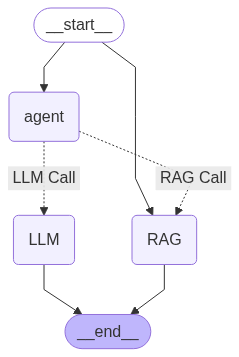

In [84]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [85]:
inputs = {"messages": ["Tell me about India's Finace Growth"]}
output = app.invoke(inputs)

 -> Calling RAG -->
Tell me about India's Finace Growth
Tell me about India's Finace Growth
Topic='Finance' Resoning="The user query is about India's finance growth"
-> Router ->
Finance
Error in Invoke: 'dict' object has no attribute 'replace'


TypeError: string indices must be integers, not 'str'

# Langgraph

In [2]:
import os
import requests
from dotenv import load_dotenv
load_dotenv()

True

## Custom  Websearch Tool

In [138]:
import os
import requests

class TaivilySearchTool:
    def __init__(self) -> None:
        self.api_key = os.getenv('TAVLY_API_KEY')
        self.base = "https://api.tavily.com/search"
    
    def search(self, query: str, max_results: int = 5) -> str:
        try:
            payload = {
                "api_key": self.api_key,
                "query": query,
                "search_depth": "advanced",
                "include_answer": True,
                "include_images": False,
                "include_raw_content": False,
                "max_results": max_results
            }

            response = requests.post(self.base, json=payload, timeout=15)
            response.raise_for_status()
            data = response.json()
            print(data)
            # Extract the top 5 search results from 'content' key
            content_list = data["results"]
            print(content_list)
            

            return content_list

        except Exception as e:
            return f"Error during search: {str(e)}"


In [139]:
l =TaivilySearchTool().search("What is the capital of France?")  # Example usage

{'query': 'What is the capital of France?', 'follow_up_questions': None, 'answer': 'The capital of France is Paris. It is the largest city and cultural center of France. Paris has a rich history and is known globally for its art and fashion.', 'images': [], 'results': [{'url': 'https://en.wikipedia.org/wiki/Paris', 'title': 'Paris - Wikipedia', 'content': 'Paris is the capital and largest city of France. With an estimated population of 2,048,472 in January 2025 in an area of more than 105 km2 (41 sq mi),', 'score': 0.98567, 'raw_content': None}, {'url': 'https://www.coe.int/en/web/interculturalcities/paris', 'title': 'Paris, France - Intercultural City - The Council of Europe', 'content': 'Paris, France - Intercultural City - Intercultural Cities Programme Council of Europe Human Rights Human Rights Online resources Human Rights Online resources # Intercultural Cities Programme - What is an intercultural city? - Intercultural Regions - Index reports per city - Intercultural profiles 2.

In [140]:
"\n".join([i['content'] for i in l])

'Paris is the capital and largest city of France. With an estimated population of 2,048,472 in January 2025 in an area of more than 105 km2 (41 sq mi),\nParis, France - Intercultural City - Intercultural Cities Programme Council of Europe Human Rights Human Rights Online resources Human Rights Online resources # Intercultural Cities Programme - What is an intercultural city? - Intercultural Regions - Index reports per city - Intercultural profiles 2. Intercultural Cities Programme 4. Paris # Paris, France - Intercultural City Paris is the capital and most populous city of France. The City of Paris has an area of 105\xa0km² and a population of 2,241,346 (2014 estimate). #### International Intercultural Cities Network - Paris Intercultural profile Intercultural Cities Index - Paris\xa0city official website - Paris Facebook page - Private office of the Secretary General - Online bookshop - Online resources **Council of Europe**,\nIn the High Middle Ages, France was a powerful but decentra

In [6]:
from src.rag.retrieval import SearchDocument

obj= SearchDocument()
llm= obj._load_llm()

Loading components...
  Loading LLM...
  Loading vector database...
Components loaded!
  Loading LLM...


In [1]:
from concurrent.futures import ThreadPoolExecutor

In [2]:
from langchain.agents import Tool
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent, ToolNode

In [13]:
llm.invoke("Hello World").content

"Hello World! It's great to meet you! Is there something I can help you with or would you like to chat?"

# Langchain Tools

In [80]:
obj = SearchDocument()
response = obj.invoke( "types of transformers")  # Example usage

In [82]:
response.binary_score

AttributeError: 'str' object has no attribute 'binary_score'

In [3]:
from typing import List, TypedDict
from langchain.schema import Document

class GraphState(TypedDict):
    """
    Represents a state of a graph.

    Attributes:
        question: Question
        generation: LLM Generation
        use_web_search: wether to use web search
        documents: List of documents
    """

    question: str
    generation: str
    use_web_search: bool
    documents: List[Document]

## Web search

In [127]:
from typing import List, Dict, Any
from langchain.schema import Document
import os
import requests
from dotenv import  load_dotenv
load_dotenv()

# Web Search Tool
class TaivilySearchTool:
    def __init__(self) -> None:
        self.api_key = os.getenv('TAVLY_API_KEY')
        self.base_url = "https://api.tavily.com/search"
    
    def search(self, query: str, max_results: int = 5) -> List[Dict]:
        try:
            payload = {
                "api_key": self.api_key,
                "query": query,
                "search_depth": "advanced",
                "include_answer": True,
                "include_images": False,
                "include_raw_content": False,
                "max_results": max_results
            }

            response = requests.post(self.base_url, json=payload, timeout=15)
            response.raise_for_status()
            data = response.json()
            return data.get("results", [])

        except Exception as e:
            print(f"Error during search: {str(e)}")
            return []
        
    def web_search(self, state: GraphState) -> Dict[str, Any]:
        """Web search tool to fetch information from the web."""
        print("="*20, 'Web Search Tool Invoked', "="*20)
        question = state['question']
        documents = state.get('documents', [])
        
        web_search_results = self.search(question)
        
        if web_search_results:
            # Join all search results into one document
            if type(web_search_results) == str:
                web_search_results
            else :
                  joined_results = "\n".join([result.get('content', '') for result in web_search_results])
                  search_doc = Document(page_content=joined_results)
                  documents.append(search_doc)
        
        print("="*20, 'Web Search Tool Completed', "="*20)
        return {"documents": documents, "question": question}

In [8]:
state = {
    "question": "What is  computing?",
    "documents": []
}

search_tool = TaivilySearchTool()
updated_state = search_tool.web_search(state)

print(updated_state)


==================== Web Search Tool Invoked ====================
==================== Web Search Tool Completed ====================
{'documents': [Document(metadata={}, page_content='Computing is any goal-oriented activity requiring, benefiting from, or creating computing machinery. It includes the study and experimentation of algorithmic\nThe history of computing is longer than the history of computing hardware and modern computing technology and includes the history of methods intended for pen\nTuring is later involved in the development of the Turing-Welchman Bombe, an electro-mechanical device designed to decipher Nazi codes during World War II, according to the UK\'s National Museum of Computing. 1941: German inventor and engineer Konrad Zuse completes his Z3 machine, the world\'s earliest digital computer, according to Gerard O\'Regan\'s book "A Brief History of Computing" (Springer, 2021). Charles Babbage\'s Difference Engine, designed in the 1820s, is considered the first "me

## Generate

In [9]:
genearation_prompt = """
You are a helpful assistant. Use the provided context to answer the user question.

<context>
{context}
</context>

Question: {question}

Answer in a concise and informative manner.
"""

In [13]:
llm = ChatGroq(
     model="llama3-8b-8192",
     api_key=os.getenv("GROQ_API_KEY")
)

In [114]:
import os
import threading
from concurrent.futures import ThreadPoolExecutor
from typing import Dict, Any
#from src.prompt import genearation_prompt # <- this is a string
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate


# Generation Tool
class GenerationTool:
    def __init__(self,llm) -> None:
        self.lock = threading.Lock()
        self.llm = llm
        print("Generation component loaded!")

    def generate(self, state: GraphState) -> Dict[str, Any]:
        print("=" * 20, 'Generation Tool Invoked', "=" * 20)
        question = state['question']
        documents = state['documents']

        # Format documents for context
        context = "\n\n".join([doc for doc in documents])
        
        prompt_template = ChatPromptTemplate.from_template(genearation_prompt)
        generation_chain = prompt_template | self.llm | StrOutputParser()
        
        output = generation_chain.invoke({"context": context, "question": question})
        
        print("=" * 20, 'Generation Completed', "=" * 20)
        return {"generation": output, "documents": documents, "question": question}


In [18]:
state = {
        "question": "What is LangChain?",
        "documents": "LangChain is a framework to build LLM applications using composable modules."
    }

updated_state = GenerationTool(llm=llm).generate(updated_state)
print("\nFinal Output:\n", updated_state)

Generation component loaded!
==================== Generation Tool Invoked ====================
==================== Generation Completed ====================

Final Output:
 {'generation': 'According to the provided context, computing is any goal-oriented activity requiring, benefiting from, or creating computing machinery. It also includes the study and experimentation of algorithmic methods.', 'documents': [Document(metadata={}, page_content='Computing is any goal-oriented activity requiring, benefiting from, or creating computing machinery. It includes the study and experimentation of algorithmic\nThe history of computing is longer than the history of computing hardware and modern computing technology and includes the history of methods intended for pen\nTuring is later involved in the development of the Turing-Welchman Bombe, an electro-mechanical device designed to decipher Nazi codes during World War II, according to the UK\'s National Museum of Computing. 1941: German inventor a

## Retriver

In [3]:
from typing import Any, Dict
from src.rag.retrieval import SearchDocument

In [80]:
# Modify
import os, sys
from functools import lru_cache
from concurrent.futures import ThreadPoolExecutor
import threading
from typing import List
from langchain_groq import ChatGroq
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_pinecone import PineconeVectorStore
from langchain_community.embeddings import HuggingFaceEmbeddings
from src.prompt import system_prompt

class SearchDocument:
    def __init__(self,llm, max_workers: int = 6) -> None:
        self.max_workers = max_workers
        self.llm = llm
        
        # Simple thread lock for safety
        self.lock = threading.Lock()
        
        # Load components in parallel (faster startup)
        self._parallel_init()
        
		  # Load retriever
        self.retriever=self._load_retriever()
        
        # Create the RAG chain
        self._create_chain()
    
    def _parallel_init(self):
        """Load LLM and retriever at the same time"""
        print("Loading components...")
        
        with ThreadPoolExecutor(max_workers=4) as executor:
            # Start loading  components simultaneously
            retriever_future = executor.submit(self._load_retriever)
            
            # Wait for  complete
            self.retriever = retriever_future.result()
            
        print("Components loaded!")
        
    
    def _load_retriever(self):
        """Load the vector database"""
        print("  Loading vector database...")
        
        embeddings = HuggingFaceEmbeddings(
            model_name='sentence-transformers/all-MiniLM-L6-v2',
            model_kwargs={'device': 'cpu'},
            encode_kwargs={'normalize_embeddings': False}
        )

        vector_db = PineconeVectorStore.from_existing_index(
            index_name="agentic-rag",
            embedding=embeddings
        )
        
        return vector_db.as_retriever(
            search_type="similarity",
            search_kwargs={'k': 5}
        )
    
    def _create_chain(self):
        """Create the RAG chain"""
        self.prompt = ChatPromptTemplate.from_messages([
            ("system", system_prompt),
            ("human", "{input}")
        ])
        
        qa_chain = create_stuff_documents_chain(self.llm, self.prompt)
        self.rag_chain = create_retrieval_chain(self.retriever, qa_chain)


    @lru_cache(maxsize=90)
    def invoke(self, input_text: str) -> str:
        """Process a single query"""
        try:
            with self.lock:  # Thread safety
                response = self.rag_chain.invoke({"input": input_text})
                return str(response['answer'])
        except Exception as e:
            return f"Error: {str(e)}"
        
    @lru_cache(maxsize=50)
    def batch_invoke(self, inputs: List[str]) -> List[str]:
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            futures = [executor.submit(self.invoke, inp) for inp in inputs]
            return [f.result() for f in futures]



In [37]:
llm =ChatGroq(model="llama3-8b-8192",
                api_key=os.getenv("GROQ_API_KEY")
            )
obj = SearchDocument(llm=llm)

Loading components...
  Loading vector database...
Components loaded!
  Loading vector database...


In [38]:
obj.invoke("types of transformer")

"I don't know. The provided context does not mention specific types of transformers, but rather refers to a termination system for gas-insulated switchgear and transformers."

In [51]:
doc=obj.retriever.invoke(" switchgear and transformers")

In [108]:
import time

class RetrieverTool:
    def __init__(self,llm):
        self.llm = llm
        self.search_doc = SearchDocument(llm=llm)
        print("=" * 20, ' Retriever Tool Invoked', "=" * 20)

    def search(self, state: GraphState):
        """High-performance document retrieval with caching"""

        start_time = time.time()
        question = state['question']
        print(question)

        try:
            print(f"🔍 Retrieving documents for: '{question}...'")

            documents = self.search_doc.invoke(question)

            print(f"Rag Tool Response: {documents}")
            print(f"Time Take: {time.time() - start_time}")
            
            print("=" * 20, ' Retriever Tool Invoked Completed', "=" * 20)
            return {"documents": documents, "question": question}

        except Exception as e:
            print(f"Vectore Scarch Error {e}")
            raise e

In [109]:
r = RetrieverTool(llm=llm)
state = {
        "question": " switchgear and transformers",
    }
r.search(state)

Loading components...
  Loading vector database...
Components loaded!
  Loading vector database...
====================  Retriever Tool Invoked ====================
 switchgear and transformers
🔍 Retrieving documents for: ' switchgear and transformers...'
Rag Tool Response: The retrieved context discusses ABB Switchgear & Transformer Termination and nkt cables Switchgear & Transformer Termination.
Time Take: 6.120862722396851
====================  Retriever Tool Invoked Completed ====================


{'documents': 'The retrieved context discusses ABB Switchgear & Transformer Termination and nkt cables Switchgear & Transformer Termination.',
 'question': ' switchgear and transformers'}

## Retrieve document Validation

In [20]:
grade_prompt = """You are a grader assessing relevance of a retrieved document to a user question. \n 
    If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""

In [ ]:
# from typing import Any, Dict, List
# from langchain_core.pydantic_v1 import BaseModel, Field
# from langchain_core.prompts import ChatPromptTemplate

# # Document Validation Tool
# class ValidateDocument(BaseModel):
#     """Binary score for the relevance check of retrieved documents"""
#     binary_score: str = Field(
#         description="Documents are relevant to the question? 'yes' or 'no'"
#     )

# class DocumentValidator:
#     def __init__(self, llm):
#         self.llm = llm
#         self.structured_output = ValidateDocument

#     def validation_chain(self, question: str, document: str):
#         structured_llm = self.llm.with_structured_output(self.structured_output)
        
#         prompt = ChatPromptTemplate.from_messages([
#             ("system", grade_prompt),
#             ("human", "Retrieved document: \n\n {document} \n\n User question: {question}")
#         ])

#         chain = prompt | structured_llm
#         response = chain.invoke({"question": question, "document": document})
#         return response

#     def validate_documents(self, state: GraphState) -> Dict[str, Any]:
#         print("=" * 20, 'Document Validation Tool Invoked', "=" * 20)
#         question = state["question"]
#         documents = state['documents']

#         filtered_docs = []
#         use_web_search = False

#         for doc in documents:
#             result = self.validation_chain(question, doc.page_content)
#             grade = result.binary_score
#             if grade.lower() == "yes":
#                 print("---------- Relevant Document -----------")
#                 filtered_docs.append(doc)
#             else:
#                 print("---------- Not Relevant Document -----------")
#                 use_web_search = True

#         print("=" * 20, 'Document Validation Completed', "=" * 20)
#         return {
#             "documents": filtered_docs,
#             "use_web_search": use_web_search,
#             "question": question,
#         }


In [131]:
from typing import Any, Dict, List
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate

# Document Validation Tool
class ValidateDocument(BaseModel):
    """Binary score for the relevance check of retrieved documents"""
    binary_score: str = Field(
        description="Documents are relevant to the question? 'yes' or 'no'"
    )

class DocumentValidatorv1:
    def __init__(self, llm):
        self.llm = llm
        self.structured_output = ValidateDocument

    def validation_chain(self, question: str, document: str):
        structured_llm = self.llm.with_structured_output(self.structured_output)
        
        prompt = ChatPromptTemplate.from_messages([
            ("system", grade_prompt),
            ("human", "Retrieved document: \n\n {document} \n\n User question: {question}")
        ])

        chain = prompt | structured_llm
        response = chain.invoke({"question": question, "document": document})
        return response

    def validate_documents(self, state: GraphState) -> Dict[str, Any]:
        print("=" * 20, 'Document Validation Tool Invoked', "=" * 20)
        question = state["question"]
        documents = state['documents']

        filtered_docs = []
        use_web_search = False
        result = self.validation_chain(question, documents)
        grade = result.binary_score
        if grade.lower() == "yes":
            print("---------- Relevant Document -----------")
            filtered_docs.append(result)
            print(filtered_docs)
        else:
            print("---------- Not Relevant Document -----------")
            use_web_search = True

        print("=" * 20, 'Document Validation Completed', "=" * 20)
        return {
            "documents": filtered_docs,
            "use_web_search": use_web_search,
            "question": question,
        }


In [133]:
state ={'documents': 'The provided context discusses ABB Switchgear & Transformer Termination, which is an oil-filled plug-in termination for gas-insulated switchgear and transformers up to 420 kV.',
 'question': ' switchgear and transformers'}

validator = DocumentValidatorv1(llm)
validated_state = validator.validate_documents(state)

print(validated_state)

==================== Document Validation Tool Invoked ====================
---------- Relevant Document -----------
[ValidateDocument(binary_score='yes')]
==================== Document Validation Completed ====================
{'documents': [ValidateDocument(binary_score='yes')], 'use_web_search': False, 'question': ' switchgear and transformers'}


## Hllucination

In [25]:
hallucination_prompt = """
You are a grader assessing whether an LLM generation is grounded in/supported by a set of retrieved facts.
Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in the facts.
"""

In [117]:
from typing import Dict
from pydantic import BaseModel, Field, constr
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableSequence
from langchain.llms import BaseLLM


# Hallucination Grader
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generated answer."""
    binary_score: str= Field(...,
        description="Is the answer grounded in the given facts? 'yes' or 'no'."
    )
    explanation: str = Field(...,
        description="Explain why the answer is or isn't grounded in the facts."
    )


class HallucinationGrader:
    def __init__(self, llm: BaseLLM):
        self.llm = llm
        self.structured_llm_grader = self.llm.with_structured_output(GradeHallucinations)
        
        self.prompt = ChatPromptTemplate.from_messages([
            ("system", hallucination_prompt),
            ("human", "Set of facts:\n\n{documents}\n\nLLM generation:\n\n{generation}")
        ])
        
        self.chain: RunnableSequence = self.prompt | self.structured_llm_grader

    def grade_hallucination(self, state: GraphState) -> Dict[str, Any]:
        print("=" * 20, 'Hallucination Grading', "=" * 20)
        documents = "\n".join([doc for doc in state["documents"]])
        generation = state["generation"]
        
        result = self.chain.invoke({
            "documents": documents,
            "generation": generation
        })
        
        print(f"Hallucination check: {result.binary_score}")
        print(f"Explanation: {result.explanation}")
        
        if result.binary_score.lower() == "yes":
            print("Generation is grounded in facts")
            return {**state}
        else:
            print("Generation contains hallucinations - triggering web search")
            return {**state, "use_web_search": True}


In [42]:
hallucination =HallucinationGrader(llm)
hallucination.grade_hallucination(updated_state)
print(hallucination)

==================== Hallucination Grading ====================
Hallucination check: yes
Explanation: The answer is grounded in the facts, as the definition of computing provided is accurate and supported by the given context.
Generation is grounded in facts


## Router

In [ ]:

message = """You are an expert at routing a user question to a vectorstore or web search.
The vectorstore contains documents related to HighVoltage and RAG.
Use the vectorstore for questions on these topics. For ANY other question, choose web-search route."""

In [75]:
# test
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field




# Question Router
class RouteQuery(BaseModel):
    """Route a user query to the most relevant data source."""
    datasource: Literal["vectorstore", "web_search"] = Field(
        ...,
        description="Route the user query to the vectorstore or websearch. Avalable options are 'vectorstore' or 'web_search'",
    )

class QuestionRouter:
	def __init__(self, llm: ChatGroq):
		self.llm = llm 
		self.structured_llm_router = llm.with_structured_output(RouteQuery)
		router_prompt = ChatPromptTemplate.from_messages(
			[("system", message), ("human", "{question}")]
		)

		self.question_router = router_prompt | self.structured_llm_router

	def route_question(self, state: GraphState):
		print("---ROUTE QUESTION---")
		question = state["question"]

		source = self.question_router.invoke({"question": question})

		if source.datasource == "web_search":
			print("Routing to web search")
			return {**state, "use_web_search": True}
		else:
			print("Routing to vectorstore")
			return {**state, "use_web_search": False}

# Manual Testing

## Web_search worflow testing

In [76]:
state = {
    "question": "What is  computing?",
    "documents": []
}
router = QuestionRouter(llm)
router_response = router.route_question(state)
print("Manual Testing: \t")
print(router_response)


search_tool = TaivilySearchTool()
search_response = search_tool.web_search(router_response)
print("======= search response ========")

print(search_response)

updated_state = GenerationTool(llm=llm).generate(search_response)
print("\nFinal Output:\n", updated_state)

hallucination = HallucinationGrader(llm)
hallucination.grade_hallucination(updated_state)
print(hallucination)

---ROUTE QUESTION---
Routing to web search
Manual Testing: 	
{'question': 'What is  computing?', 'documents': [], 'use_web_search': True}
==================== Web Search Tool Invoked ====================
==================== Web Search Tool Completed ====================
======= search response ========
{'documents': [Document(metadata={}, page_content='to pin down, but the Computing Curricula 2005: The Overview Report prepared by a joint committee of ACM, IEEE, and AIS gives the following definition: "In a general way, we can define computing to mean any goal-oriented activity requiring, benefiting from, or creating computers.‖ This is a very broad definition that comprises the development of computer hardware, the use of computer applications, and the development of computer software. This text focuses on the last of these enterprises, the [...] way because they vary from place to place and they change over time. In a similar way, entering the field of computing can be disorienting a

## vectore search workflow testing

In [115]:
state = {'documents': 'The provided context discusses ABB Switchgear & Transformer Termination, which is an oil-filled plug-in termination for gas-insulated switchgear and transformers up to 420 kV.',
 'question': ' switchgear and transformers'}
router = QuestionRouter(llm)
router_response = router.route_question(state)
print("Manual Testing: \t")
print(router_response)


rag_tool = RetrieverTool(llm)
search_response = rag_tool.search(router_response)
print("======= Rag response ========")
print(search_response)

---ROUTE QUESTION---
Routing to web search
Manual Testing: 	
{'documents': 'The provided context discusses ABB Switchgear & Transformer Termination, which is an oil-filled plug-in termination for gas-insulated switchgear and transformers up to 420 kV.', 'question': ' switchgear and transformers', 'use_web_search': True}
Loading components...
  Loading vector database...
Components loaded!
  Loading vector database...
====================  Retriever Tool Invoked ====================
 switchgear and transformers
🔍 Retrieving documents for: ' switchgear and transformers...'
Rag Tool Response: The provided context describes cable accessories for switchgear and transformers, including oil-filled plug-in terminations and dry-type plug-in terminations. These terminations are designed for installation in gas-insulated switchgear, transformers, or oil-filled cable boxes, and are suitable for operation up to 420 kV.
Time Take: 3.9920663833618164
====================  Retriever Tool Invoked Compl

In [118]:
rag_validation = DocumentValidatorv1(llm)
vali_response = rag_validation.validate_documents(search_response)
print("======= vali response ========")
print(f"Validation Result \t: {vali_response}")

updated_state = GenerationTool(llm=llm).generate(search_response)
print("\nFinal Output:\n", updated_state)
print("======= gen response ========")

hallucination = HallucinationGrader(llm)
hallucination.grade_hallucination(updated_state)
print(hallucination)

==================== Document Validation Tool Invoked ====================
---------- Relevant Document -----------
[ValidateDocument(binary_score='yes')]
==================== Document Validation Completed ====================
======= vali response ========
Validation Result 	: {'documents': [ValidateDocument(binary_score='yes')], 'use_web_search': False, 'question': ' switchgear and transformers'}
Generation component loaded!
==================== Generation Tool Invoked ====================
==================== Generation Completed ====================

Final Output:
 {'generation': 'Based on the provided context, I can help you with questions related to switchgear and transformers.\n\nSwitchgear and Transformers:\n\n* Switchgear: A term used to describe electrical equipment that controls the flow of electrical current, including circuit breakers, switches, and fuses.\n* Transformers: A device that transfers electrical energy from one circuit to another through electromagnetic inducti

In [134]:
state ={'documents': 'The provided context discusses ABB Switchgear & Transformer Termination, which is an oil-filled plug-in termination for gas-insulated switchgear and transformers up to 420 kV.',
 'question': ' switchgear and transformers'}

router = QuestionRouter(llm)
router_response = router.route_question(state)
print("Manual Testing: \t")
print(router_response)


rag_tool = RetrieverTool(llm)
search_response = rag_tool.search(router_response)
print("======= Rag response ========")
print(search_response)

validator = DocumentValidatorv1(llm)
validated_state = validator.validate_documents(state)

print(validated_state)

---ROUTE QUESTION---
Routing to web search
Manual Testing: 	
{'documents': 'The provided context discusses ABB Switchgear & Transformer Termination, which is an oil-filled plug-in termination for gas-insulated switchgear and transformers up to 420 kV.', 'question': ' switchgear and transformers', 'use_web_search': True}
Loading components...
  Loading vector database...
Components loaded!
  Loading vector database...
====================  Retriever Tool Invoked ====================
 switchgear and transformers
🔍 Retrieving documents for: ' switchgear and transformers...'
Rag Tool Response: The context discusses switchgear and transformers, specifically mentioning cable accessories for underground transmission solutions, such as oil-filled plug-in terminations and dry-type plug-in terminations.
Time Take: 5.744072437286377
====================  Retriever Tool Invoked Completed ====================
======= Rag response ========
{'documents': 'The context discusses switchgear and transfor

# Agent

## Agent exp -1

In [28]:
from langgraph.graph import StateGraph, END

In [36]:
# Main RAG Agent Workflow
class RAGAgent:
    def __init__(self):
        # Initialize LLM
        self.llm = ChatGroq(
            model="llama3-8b-8192",
            api_key=os.getenv("GROQ_API_KEY")
        )
        
        # Initialize tools
        self.web_search_tool = TaivilySearchTool()
        self.generation_tool = GenerationTool(self.llm)
        self.document_validator = DocumentValidator(self.llm)
        self.hallucination_grader = HallucinationGrader(self.llm)
        self.question_router = QuestionRouter(self.llm)
        
        # Build the graph
        self.workflow = self._build_graph()

    def _build_graph(self):
        workflow = StateGraph(GraphState)
        
        # Add nodes
        workflow.add_node("route_question", self.question_router.route_question)
        workflow.add_node("web_search", self.web_search_tool.web_search)
        workflow.add_node("validate_documents", self.document_validator.validate_documents)
        workflow.add_node("generate", self.generation_tool.generate)
        workflow.add_node("grade_hallucination", self.hallucination_grader.grade_hallucination)
        
        # Define the flow
        workflow.set_entry_point("route_question")
        
        # Conditional edges
        workflow.add_conditional_edges(
            "route_question",
            self._decide_next_step,
            {
                "web_search": "web_search",
                "validate_documents": "validate_documents"
            }
        )
        
        workflow.add_edge("web_search", "generate")
        
        workflow.add_conditional_edges(
            "validate_documents",
            self._decide_after_validation,
            {
                "web_search": "web_search",
                "generate": "generate"
            }
        )
        
        workflow.add_edge("generate", "grade_hallucination")
        
        workflow.add_conditional_edges(
            "grade_hallucination",
            self._decide_after_hallucination_check,
            {
                "web_search": "web_search",
                "end": END
            }
        )
        
        return workflow.compile()

    def _decide_next_step(self, state: GraphState) -> str:
        if state.get("use_web_search", False):
            return "web_search"
        return "validate_documents"

    def _decide_after_validation(self, state: GraphState) -> str:
        if state.get("use_web_search", False):
            return "web_search"
        return "generate"

    def _decide_after_hallucination_check(self, state: GraphState) -> str:
        if state.get("use_web_search", False):
            return "web_search"
        return "end"

    def run(self, question: str, documents: List[Document] = None) -> Dict[str, Any]:
        """Run the RAG agent workflow"""
        initial_state = {
            "question": question,
            "generation": "",
            "use_web_search": False,
            "documents": documents or []
        }
        
        result = self.workflow.invoke(initial_state)
        return result


In [37]:
# Initialize the RAG agent
agent = RAGAgent()

# Example question
question = "What are the latest developments in machine learning?"

# Run the workflow
result = agent.run(question)

print("\n" + "="*50)
print("FINAL RESULT:")
print("="*50)
print(f"Question: {result['question']}")
print(f"Answer: {result['generation']}")
print(f"Documents used: {len(result['documents'])}")

Generation component loaded!
==================== Question Routing ====================
Routing to vectorstore
==================== Document Validation Tool Invoked ====================
==================== Document Validation Completed ====================
==================== Generation Tool Invoked ====================
==================== Generation Completed ====================
==================== Hallucination Grading ====================


BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '{"tool_use":{"tool_calls":[{"id":"pending","type":"function","function":{"name":"GradeHallucinations"},"parameters":{"binary_score":"yes","explanation":"The answer is grounded in the facts provided, which are the latest advancements in machine learning. The LLM generation provides a clear and concise summary of the key developments in machine learning, and it is supported by the facts."}}]}}'}}

In [38]:
agent.workflow

## Agent exp -2

In [141]:
import os, sys
from typing import Dict, Any, List
from concurrent.futures import ThreadPoolExecutor
from langchain_groq import ChatGroq
from langchain.schema import Document
from langgraph.graph import StateGraph, END
from dotenv import load_dotenv

load_dotenv()

from src.exception import CustomException
from src.agent.constant import GraphState
from src.agent.nodes.web_search import TaivilySearchTool
from src.agent.nodes.generation import GenerationTool
from src.agent.nodes.vectoredb_retrieval import RetrieverTool
from src.agent.nodes.grade import HallucinationGrader, RetrieverValidator
from src.agent.route import QuestionRouter

class AgenticRAG:
    def __init__(self) -> None:
        self.llm = self._load_model()

        # Tools
        self.web_search_tool = TaivilySearchTool()
        self.rag_tool = RetrieverTool(self.llm)
        self.generation_tool = GenerationTool(self.llm)
        self.document_validator = RetrieverValidator(self.llm)
        self.hallucination_grader = HallucinationGrader(self.llm)
        self.question_router = QuestionRouter(self.llm)

        self.workflow = self._build_graph()

    def _load_model(self):
        with ThreadPoolExecutor(max_workers=4) as executor:
            return executor.submit(
                ChatGroq, model="llama3-8b-8192", api_key=os.getenv("GROQ_API_KEY")
            ).result()

    def _build_graph(self):
        workflow = StateGraph(GraphState)

        # Nodes
        workflow.add_node("route_question", self.question_router.route_question)
        workflow.add_node("rag_tool", self.rag_tool.search)
        workflow.add_node("validate_documents", self.document_validator.validate_documents)
        workflow.add_node("web_search", self.web_search_tool.web_search)
        workflow.add_node("generate", self.generation_tool.generate)
        workflow.add_node("grade_hallucination", self.hallucination_grader.grade_hallucination)

        # Entry
        workflow.set_entry_point("route_question")
        workflow.add_edge("route_question", "rag_tool")
        workflow.add_edge("rag_tool", "validate_documents")

        # After validation: if valid → generate, else → web_search
        workflow.add_conditional_edges(
            "validate_documents",
            self._decide_after_validation,
            {
                "generate": "generate",
                "web_search": "web_search"
            }
        )

        # From web search → generate
        workflow.add_edge("web_search", "generate")

        # After generate → hallucination grader
        workflow.add_edge("generate", "grade_hallucination")

        # After hallucination grading: if hallucinated → web_search again, else → end
        workflow.add_conditional_edges(
            "grade_hallucination",
            self._decide_after_hallucination_check,
            {
                "web_search": "web_search",
                "end": END
            }
        )

        return workflow.compile()

    def _decide_after_validation(self, state: GraphState) -> str:
        """If validation fails, fallback to web search"""
        if state.get("use_web_search", False):
            return "web_search"
        return "generate"

    def _decide_after_hallucination_check(self, state: GraphState) -> str:
        """If hallucination is True, go to web_search again"""
        if state.get("use_web_search", False):
            return "web_search"
        return "end"

    def run(self, question: str, documents: List[Document] = None) -> Dict[str, Any]:
        try:
            initial_state = {
                "question": question,
                "generation": "",
                "use_web_search": False,  # 👈 default assumes RAG is confident
                "documents": documents or []
            }
            return self.workflow.invoke(initial_state)
        except Exception as e:
            raise CustomException(e, sys)


C:\Users\www58\AppData\Local\Temp\ipykernel_4788\3186754669.py:16: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from src.agent.nodes.grade import HallucinationGrader, RetrieverValidator


In [142]:
try:
	# Initialize the RAG agent
	agent = AgenticRAG()

	# Example question
	question = "What are the latest developments in machine learning?"

	# Run the workflow
	result = agent.run(question)

	print("\n" + "="*50)
	print("FINAL RESULT:")
	print("="*50)
	print(f"Question: {result['question']}")
	print(f"Answer: {result['generation']}")
	print(f"Documents used: {len(result['documents'])}")
except Exception as e:
	print(e)

Loading components...
  Loading vector database...
Components loaded!
  Loading vector database...
====================  Retriever Tool Invoked ====================
==================== Question Routing ====================


--- Logging error ---
Traceback (most recent call last):
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 1110, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 953, in format
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 687, in format
    record.message = record.getMessage()
                     ^^^^^^^^^^^^^^^^^^^
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 377, in getMessage
    msg = msg % self.args
          ~~~~^~~~~~~~~~~
TypeError: not all arguments converted during string formatting
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "e:\GENAI\genai\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "e:\GENAI\genai\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.

Routing result: datasource='web_search'
Routing to web search
 ================= routing completed =================
What are the latest developments in machine learning?
I don't know

final result : I don't know 	 web search : 	 True
====================  Retriever Tool Invoked Completed ====================
==================== Document Validation Tool Invoked ====================
---------- Not Relevant Document -----------
==================== Document Validation Completed ====================
==================== Web Search Tool Invoked ====================
[{'url': 'https://ep.jhu.edu/news/advancements-in-ai-and-machine-learning/', 'title': 'Advancements in AI and Machine Learning', 'content': 'AI algorithms process vast datasets to provide insights that support strategic planning and resource allocation to streamline decision-making. This allows engineers to focus more on innovation and complex problem-solving.\n\n## Recent Advancements in AI and Machine Learning\n\nThe advancem

In [143]:
try:

	# Example question
	question = "What are the specifications of ABB JX245 and SMPGB joint?"

	# Run the workflow
	result = agent.run(question)

	print("\n" + "="*50)
	print("FINAL RESULT:")
	print("="*50)
	print(f"Question: {result['question']}")
	print(f"Answer: {result['generation']}")
	print(f"Documents used: {len(result['documents'])}")
except Exception as e:
	print(e)

==================== Question Routing ====================


--- Logging error ---
Traceback (most recent call last):
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 1110, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 953, in format
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 687, in format
    record.message = record.getMessage()
                     ^^^^^^^^^^^^^^^^^^^
  File "e:\GENAI\genai\Lib\logging\__init__.py", line 377, in getMessage
    msg = msg % self.args
          ~~~~^~~~~~~~~~~
TypeError: not all arguments converted during string formatting
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "e:\GENAI\genai\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "e:\GENAI\genai\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.

 ================= routing completed =================
Error occurred python script name [C:\Users\www58\AppData\Local\Temp\ipykernel_4788\3186754669.py] line number [103] error message [Error occurred python script name [d:\genaiprojects\calling-repasentive-ai\calling-agent\src\agent\route.py] line number [42] error message [Error code: 400 - {'error': {'message': "tool call validation failed: attempted to call tool 'WebSearch' which was not request.tools", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool-use>\n{\n  "tool_calls": [\n    {\n      "id": "pending",\n      "type": "function",\n      "function": {\n        "name": "WebSearch"\n      },\n      "parameters": {\n        "query": "What are the specifications of ABB JX245 and SMPGB joint?"\n      }\n    }\n  ]\n}\n</tool-use>'}}]]


In [144]:
agent.workflow

In [136]:
graph.workflow

AttributeError: 'CompiledStateGraph' object has no attribute 'workflow'